Average path length and clustering coefficient of Albert–Barabási preferential-growth graphs. 

Create a large Albert–Barabási preferential-growth graph (n = 1000) for different values of m.

a) Calculate the average path length of the graph as a function of n for each m and plot your results. Compare your results with figure 12.7(a). [Hint: You can calculate the average path length of the graph during the growth and record it as a function of n for computational efficiency.]

b) Simulate Albert–Barabási graphs with n0 = 20 and m ∈ [1, 2, 3, ... , 20] for n = 1000 and calculate the clustering coefficient of each graph. Compare your results with figure 12.7(b).

In [51]:
import numpy as np

def RoulettWheel(kProbabilities):
    r = np.random.uniform(low=0.0,high=1.0)
    for j in range(kProbabilities.shape[0]):
            if kProbabilities[j,0]>r:
                index = kProbabilities[j,1]
                break
    
    return index

In [75]:
import numpy as np
import tqdm as tqdm
import matplotlib.pyplot as plt

n0 = 10
parameterM = [1,3,10]
n = 1000
steps = n - n0

averagePathLengths = []
listOfAveragePathLengths = []
listforB = []


for g, m in enumerate(parameterM):
    adjMatrix = np.ones((n0, n0))

    for step in tqdm.trange(steps):  # Use a different variable for the inner loop
        np.fill_diagonal(adjMatrix, 0)
        
        degrees = np.sum(adjMatrix, axis=1, dtype='int')
        totDegrees = np.sum(degrees)
        degrees = np.cumsum(degrees)
        kProbabilities=degrees/totDegrees
        kProbabilities = np.column_stack((kProbabilities, np.arange(n0)))    
        sorted_indices = np.argsort(kProbabilities[:, 0])[::1]
        kProbabilities = kProbabilities[sorted_indices]

        
        newColumn = np.zeros((n0, 1))
        for i in range(m):
            tmpIdx = RoulettWheel(kProbabilities)
            tmpIdx = int(tmpIdx)
            newColumn[tmpIdx] = 1
            copyAdjMatrix = np.copy(adjMatrix)
            copyAdjMatrix = np.delete(copyAdjMatrix, tmpIdx, axis=0)
            degrees = np.sum(copyAdjMatrix, axis=1, dtype='int')
            totDegrees = np.sum(degrees)
            degrees = np.cumsum(degrees)
            kProbabilities=degrees/totDegrees
            kProbabilities = np.column_stack((kProbabilities, np.arange(len(kProbabilities))))    
            sorted_indices = np.argsort(kProbabilities[:, 0])[::1]
            kProbabilities = kProbabilities[sorted_indices]  

        # Change Adjacency Matrix
        newRow = np.reshape(newColumn, (1, n0))
        newRow = np.c_[newRow, [0]]
        adjMatrix = np.c_[adjMatrix, newColumn]
        adjMatrix = np.r_[adjMatrix, newRow]

        
        n0 += 1

        if (step % 5) == 0:
            pathMatrix = np.ones((n0, n0)) * (-1)
            q = 1
            offCount = n0 + 1
            while offCount > n0:
                resMat = np.linalg.matrix_power(adjMatrix, q)
                
                for s in range(n0):
                    for t in range(s,n0):
                        if resMat[s, t] != 0 and pathMatrix[s, t] == -1 and pathMatrix[t, s] == -1 and s != t:
                            pathMatrix[s, t] = q
                            pathMatrix[t, s] = q

                offCount = np.count_nonzero(pathMatrix == -1)
                q += 1

            totalPathLength = np.sum(pathMatrix)
            averagePathLength = totalPathLength / (n0 * (n0 - 1))

            
            averagePathLengths.append(averagePathLength)
        

    
    degrees = np.sum(adjMatrix, axis=1, dtype='int')
    listforB.append(degrees)
    listOfAveragePathLengths.append(averagePathLengths)
    averagePathLengths = []
    n0 = 10


    



100%|██████████| 990/990 [01:03<00:00, 15.58it/s] 


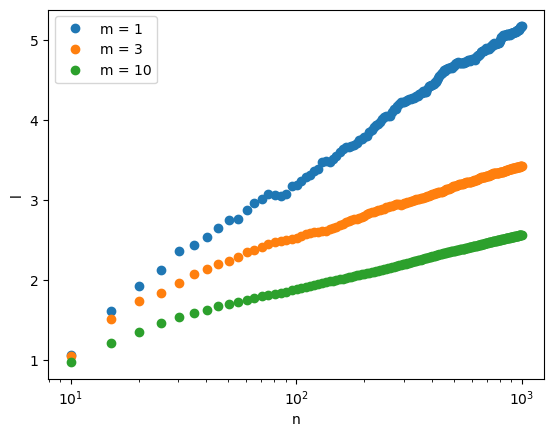

In [79]:
A = listOfAveragePathLengths[0]
B = listOfAveragePathLengths[1]
C = listOfAveragePathLengths[2]

xLine = np.linspace(10, 1000, 198)

plt.semilogx(xLine, A, label='m = 1', marker='o', linestyle='None')
plt.semilogx(xLine, B, label='m = 3', marker='o', linestyle='None')
plt.semilogx(xLine, C, label='m = 10', marker='o', linestyle='None')

plt.legend()
plt.xlabel('n')
plt.ylabel('l')
plt.show()

In [ ]:
n0 = 20
parameterM = np.linspace(1,20,20)
n = 1000
steps = n - n0

listClusteringCoeff = []

for g, m in enumerate(parameterM):
    adjMatrix = np.ones((n0, n0))

    for step in range(steps):  # Use a different variable for the inner loop
        np.fill_diagonal(adjMatrix, 0)
        
        degrees = np.sum(adjMatrix, axis=1, dtype='int')
        totDegrees = np.sum(degrees)
        degrees = np.cumsum(degrees)
        kProbabilities=degrees/totDegrees
        kProbabilities = np.column_stack((kProbabilities, np.arange(n0)))    
        sorted_indices = np.argsort(kProbabilities[:, 0])[::1]
        kProbabilities = kProbabilities[sorted_indices]

        
        newColumn = np.zeros((n0, 1))
        for i in range(int(m)):
            tmpIdx = RoulettWheel(kProbabilities)
            tmpIdx = int(tmpIdx)
            newColumn[tmpIdx] = 1
            copyAdjMatrix = np.copy(adjMatrix)
            copyAdjMatrix = np.delete(copyAdjMatrix, tmpIdx, axis=0)
            degrees = np.sum(copyAdjMatrix, axis=1, dtype='int')
            totDegrees = np.sum(degrees)
            degrees = np.cumsum(degrees)
            kProbabilities=degrees/totDegrees
            kProbabilities = np.column_stack((kProbabilities, np.arange(len(kProbabilities))))    
            sorted_indices = np.argsort(kProbabilities[:, 0])[::1]
            kProbabilities = kProbabilities[sorted_indices]  

        # Change Adjacency Matrix
        newRow = np.reshape(newColumn, (1, n0))
        newRow = np.c_[newRow, [0]]
        adjMatrix = np.c_[adjMatrix, newColumn]
        adjMatrix = np.r_[adjMatrix, newRow]

        
        n0 += 1

    # Calculate Coeff
    cubeAdjMatrix = np.linalg.matrix_power(adjMatrix,3)
    nominator= np.trace(cubeAdjMatrix)
    degrees = np.sum(adjMatrix, axis=1, dtype='int')
    tmpFactor = [degree*(degree-1) for degree in degrees]
    denominator = np.sum(tmpFactor)

    clusteringCoeff = nominator/denominator
    listClusteringCoeff.append(clusteringCoeff)

    n0 = 20


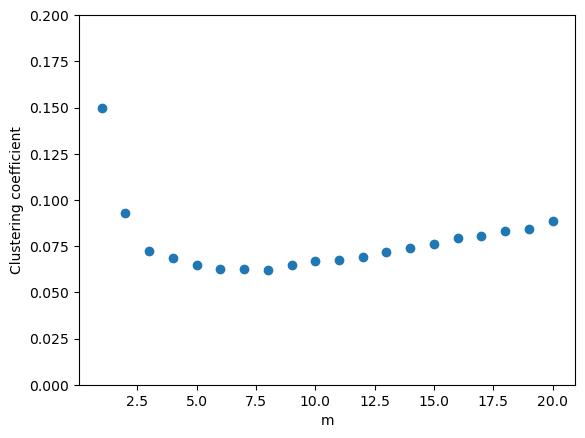

In [83]:
plt.plot(parameterM,listClusteringCoeff,'o')
plt.ylabel('Clustering coefficient')
plt.xlabel('m')
plt.ylim([0,0.2])
plt.show()